###Key Points for any ML/Dl Model (Classification and Regression)

1) ML model can't accpet null values.</br> 
2) ML model accepts only int and float data types(certainly for independent variables but is conditional for dependent varaibles)</br>
3) x(Independent varibles) should be in DataFrame or 2D numpy array</br>
4) y(Dependent varibles) should be in Series or 1D numpy array</br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.shape

(768, 9)

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [9]:
x.shape

(768, 8)

In [10]:
y.shape

(768,)

In [11]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [16]:
m1 = LogisticRegression(solver='liblinear')
m1.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [17]:
print('Training score',m1.score(x_train,y_train))
print('Testing score',m1.score(x_test,y_test))

Training score 0.7847222222222222
Testing score 0.75


In [18]:
ypred_logreg = m1.predict(x_test)
print(ypred_logreg)

[1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0
 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 1 1 1 0 1]


In [19]:
cm_logreg = confusion_matrix(y_test,ypred_logreg)
print(cm_logreg)
print(classification_report(y_test,ypred_logreg))

[[108  18]
 [ 30  36]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       126
           1       0.67      0.55      0.60        66

    accuracy                           0.75       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.74      0.75      0.74       192



### KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
m2 = KNeighborsClassifier(n_neighbors=25)
m2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [22]:
print('Training score',m2.score(x_train,y_train))
print('Testing score',m2.score(x_test,y_test))

Training score 0.765625
Testing score 0.7135416666666666


In [23]:
ypred_knn = m2.predict(x_test)
print(ypred_knn)

[1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0
 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0]


In [24]:
cm_knn = confusion_matrix(y_test,ypred_knn)
print(cm_knn)
print(classification_report(y_test,ypred_knn))

[[107  19]
 [ 36  30]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       126
           1       0.61      0.45      0.52        66

    accuracy                           0.71       192
   macro avg       0.68      0.65      0.66       192
weighted avg       0.70      0.71      0.70       192



### SVM

In [25]:
from sklearn.svm import SVC

In [26]:
from sklearn import svm
m3 = SVC(kernel='linear',C=1.0)
m4 = SVC(kernel='rbf',C=1.0,gamma=0.01)
m5 = SVC(kernel='poly',degree=2)

In [27]:
m3.fit(x_train,y_train)
print('Training score',m3.score(x_train,y_train))
print('Testing score',m3.score(x_test,y_test))

Training score 0.7881944444444444
Testing score 0.7552083333333334


In [28]:
ypred_svm = m3.predict(x_test)
print(ypred_svm)

[1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0
 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 1 1 1 1 1]


In [30]:
cm_svm = confusion_matrix(y_test,ypred_svm)
print(cm_svm)
print(classification_report(y_test,ypred_svm))

[[106  20]
 [ 27  39]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       126
           1       0.66      0.59      0.62        66

    accuracy                           0.76       192
   macro avg       0.73      0.72      0.72       192
weighted avg       0.75      0.76      0.75       192



In [31]:
m4.fit(x_train,y_train)
print('Training score',m4.score(x_train,y_train))
print('Testing score',m4.score(x_test,y_test))

Training score 0.9809027777777778
Testing score 0.6666666666666666


In [32]:
ypred_svm = m4.predict(x_test)
print(ypred_svm)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0]


In [34]:
cm_svm = confusion_matrix(y_test,ypred_svm)
print(cm_svm)
print(classification_report(y_test,ypred_svm))

[[116  10]
 [ 54  12]]
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       126
           1       0.55      0.18      0.27        66

    accuracy                           0.67       192
   macro avg       0.61      0.55      0.53       192
weighted avg       0.64      0.67      0.61       192



In [36]:
m5.fit(x_train,y_train)
print('Training score',m5.score(x_train,y_train))
print('Testing score',m5.score(x_test,y_test))

Training score 0.7847222222222222
Testing score 0.75


In [38]:
ypred_svm = m5.predict(x_test)
print(ypred_svm)

[1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1]


In [39]:
cm_svm = confusion_matrix(y_test,ypred_svm)
print(cm_svm)
print(classification_report(y_test,ypred_svm))

[[113  13]
 [ 35  31]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       126
           1       0.70      0.47      0.56        66

    accuracy                           0.75       192
   macro avg       0.73      0.68      0.69       192
weighted avg       0.74      0.75      0.74       192



###Decision Tree

It sufferes from overfitting=> Training score = 1, testing score will be comparatively poor

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
m6 = DecisionTreeClassifier(criterion = 'entropy')
m6.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [43]:
print('Training score',m6.score(x_train,y_train))
print('Testing score',m6.score(x_test,y_test))

Training score 1.0
Testing score 0.65625


In [44]:
ypred_dt = m6.predict(x_test)
print(ypred_dt)

[1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1
 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 0 0 1 1 0 1]


In [45]:
cm_dt = confusion_matrix(y_test,ypred_dt)
print(cm_dt)
print(classification_report(y_test,ypred_dt))

[[90 36]
 [30 36]]
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       126
           1       0.50      0.55      0.52        66

    accuracy                           0.66       192
   macro avg       0.62      0.63      0.63       192
weighted avg       0.66      0.66      0.66       192



In [46]:
fn = x_train.columns
cn = ['0','1']
print(fn)
print(cn)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
['0', '1']


In [47]:
from sklearn import tree

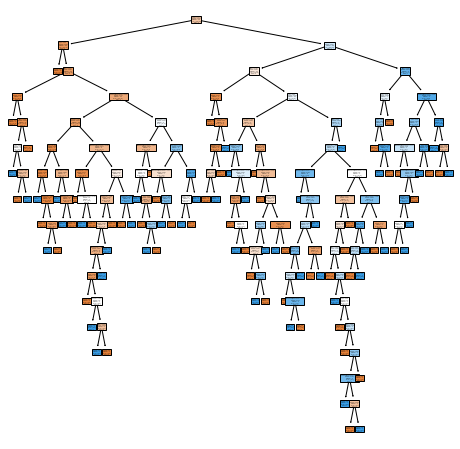

In [48]:
plt.figure(figsize=(8,8))
tree.plot_tree(m6,feature_names=fn,class_names=cn,filled=True)
plt.show()

In [49]:
m7 = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=20)
m7.fit(x_train,y_train)
print('Training score',m7.score(x_train,y_train))
print('Testing score',m7.score(x_test,y_test))

Training score 0.7777777777777778
Testing score 0.71875


In [50]:
ypred_dt2 = m7.predict(x_test)
print(ypred_dt2)

[1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1
 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 0 0]


In [51]:
cm_dt2 = confusion_matrix(y_test,ypred_dt2)
print(cm_dt2)
print(classification_report(y_test,ypred_dt2))

[[102  24]
 [ 30  36]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       126
           1       0.60      0.55      0.57        66

    accuracy                           0.72       192
   macro avg       0.69      0.68      0.68       192
weighted avg       0.71      0.72      0.72       192



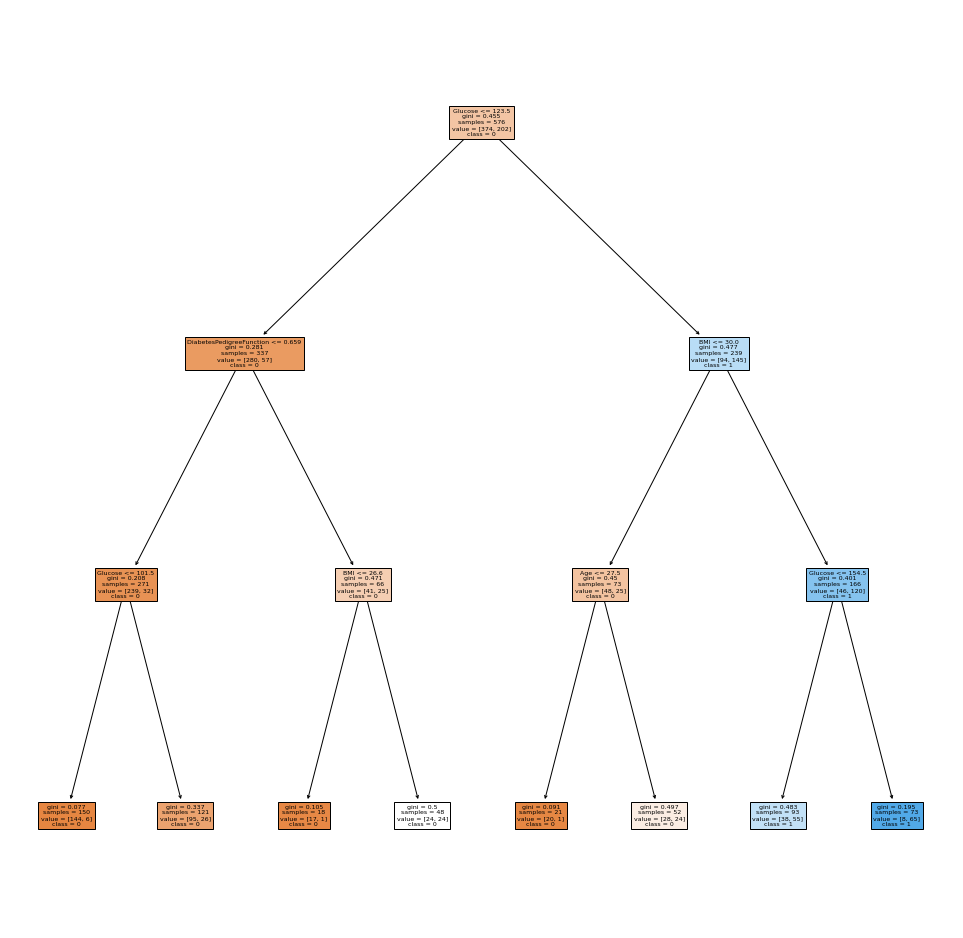

In [54]:
plt.figure(figsize=(17,17))
tree.plot_tree(m7,feature_names=fn,class_names=cn,filled=True)
plt.show()

### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
# n_estimators = no of trees that we want in our Random Forest
m8 = RandomForestClassifier(n_estimators=70,criterion='gini',max_depth=8)
m8.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=70)

In [57]:
print('Training score',m8.score(x_train,y_train))
print('Testing score',m8.score(x_test,y_test))

Training score 0.9774305555555556
Testing score 0.7135416666666666


In [58]:
ypred_rf = m8.predict(x_test)
print(ypred_rf)

[1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1
 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0
 0 0 0 1 1 0 1]


In [59]:
cm_rf = confusion_matrix(y_test,ypred_rf)
print(cm_rf)
print(classification_report(y_test,ypred_rf))

[[100  26]
 [ 29  37]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       126
           1       0.59      0.56      0.57        66

    accuracy                           0.71       192
   macro avg       0.68      0.68      0.68       192
weighted avg       0.71      0.71      0.71       192

